In [76]:
# Proyecto de clasificadores
# Alumno: Gael Peña Fonseca

In [99]:
# Importamos las paqueterias necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [109]:
class Clasificadores:
    '''
    Esta clase organiza el entrenamiento y la evaluación de cinco modelos
    de clasificación estándar utilizando herramientas de la paquetería
    Scikit-learn.
    '''

    def __init__(self):
        '''
        Definimos a los clasificadores con la ayuda de las paqueterías:
        - "RL": Regresión Logística
        - "K-NN": K-Nearest Neighbors
        - "MSV": Máquina de Soporte Vectorial
        - "AD": Árbol de Decisión
        - "RF": Random Forest
        '''
        self.modelos = {
            "RL": LogisticRegression(),
            "K-NN": KNeighborsClassifier(),
            "MSV": SVC(),
            "AD": DecisionTreeClassifier(),
            "RF": RandomForestClassifier(),
        }
        self.resultados = {}

    def ent_modelos(self, X_train, y_train):
        '''
        Entrena cada modelo usando el método .fit(X_train, y_train).
        .fit() entrena el modelo ajustando parámetros internos a los
        datos de entrenamiento.
        '''
        # Entrenamiento mediante un bucle simple
        for nombre, modelo in self.modelos.items():
            modelo.fit(X_train, y_train)  # Entrenar con fit
            print(f"Modelo {nombre} entrenado.")

    def ev_modelos(self, X_test, y_test):
        '''
        Evalúa cada modelo con los datos de prueba.

        Métricas calculadas:
        - Matriz de confusión: compara predicciones con etiquetas reales.
        - Reporte de clasificación: incluye precisión, sensibilidad y
          F1-score.
        '''
        # Evaluar clasificadores
        for nombre, modelo in self.modelos.items():
            predicciones = modelo.predict(X_test)
            print(f"\nEvaluación del modelo: {nombre}")

            # Matriz de confusión
            print("\nMatriz de confusión:")
            print(confusion_matrix(y_test, predicciones))

            # Reporte de clasificación
            print("\nReporte de clasificación:")
            print(classification_report(y_test, predicciones))

            # Guardar resultados
            self.resultados[nombre] = classification_report(
                y_test, predicciones, output_dict=True
            )

In [110]:
# A cargar los datos chavales
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

DF2 = pd.read_csv("/content/cancer - cancer.csv")
print(DF2)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
494    914102         B        13.16         20.54           84.06      538.7   
495    914333         B        14.87         20.21           96.12      680.9   
496    914366         B        12.65         18.17           82.69      485.6   
497    914580         B        12.47         17.31           80.45      480.1   
498    914769         M        18.49         17.52          121.30     1068.0   

     smoothness_mean  compa

In [126]:
#Convertir 'diagnosis' a valores numericos utilizando un loop
diagnosis_numerico = []
for valor in DF2['diagnosis']:
    if valor == 'M':
        diagnosis_numerico.append(1)
    else:
        diagnosis_numerico.append(0)
DF2['diagnosis'] = diagnosis_numerico

#Separar caracteristicas (X) y etiquetas (y)
X = DF2.drop(['id', 'diagnosis'], axis=1)
y = DF2['diagnosis']

#Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#escalar caracteristicas utilizando metodos basicos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Guardar conjuntos en CSV
train_data = pd.DataFrame(X_train, columns=X.columns)
train_data['diagnosis'] = y_train.values
train_data.to_csv('datos_entrenamiento.csv', index=False)

test_data = pd.DataFrame(X_test, columns=X.columns)
test_data['diagnosis'] = y_test.values
test_data.to_csv('datos_prueba.csv', index=False)

print("\nArchivos CSV creados:")
print("1. datos_entrenamiento.csv")
print("2. datos_prueba.csv")


Archivos CSV creados:
1. datos_entrenamiento.csv
2. datos_prueba.csv


In [116]:
#Crear una instancia de la clase Clasificadores
clasificadores = Clasificadores()

#entrenar los modelos
print("\nentrenando clasificadores ")
clasificadores.ent_modelos(X_train, y_train)


entrenando clasificadores 
Modelo RL entrenado.
Modelo K-NN entrenado.
Modelo MSV entrenado.
Modelo AD entrenado.
Modelo RF entrenado.


In [118]:
#evaluar los modelos entrenados
print("\n evaluando clasificadores ")
clasificadores.ev_modelos(X_test, y_test)


 evaluando clasificadores 

Evaluación del modelo: RL

Matriz de confusión:
[[61  0]
 [ 1 38]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.97      0.99        39

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100


Evaluación del modelo: K-NN

Matriz de confusión:
[[61  0]
 [ 1 38]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.97      0.99        39

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100


Evaluación del modelo: MSV

Matriz de confusión:
[[60  1]
 [ 1 38]]

Reporte de clasificación:
              precision    rec


 Comparacion de precision 
RL: 0.990000
K-NN: 0.990000
MSV: 0.980000
AD: 0.950000
RF: 0.970000


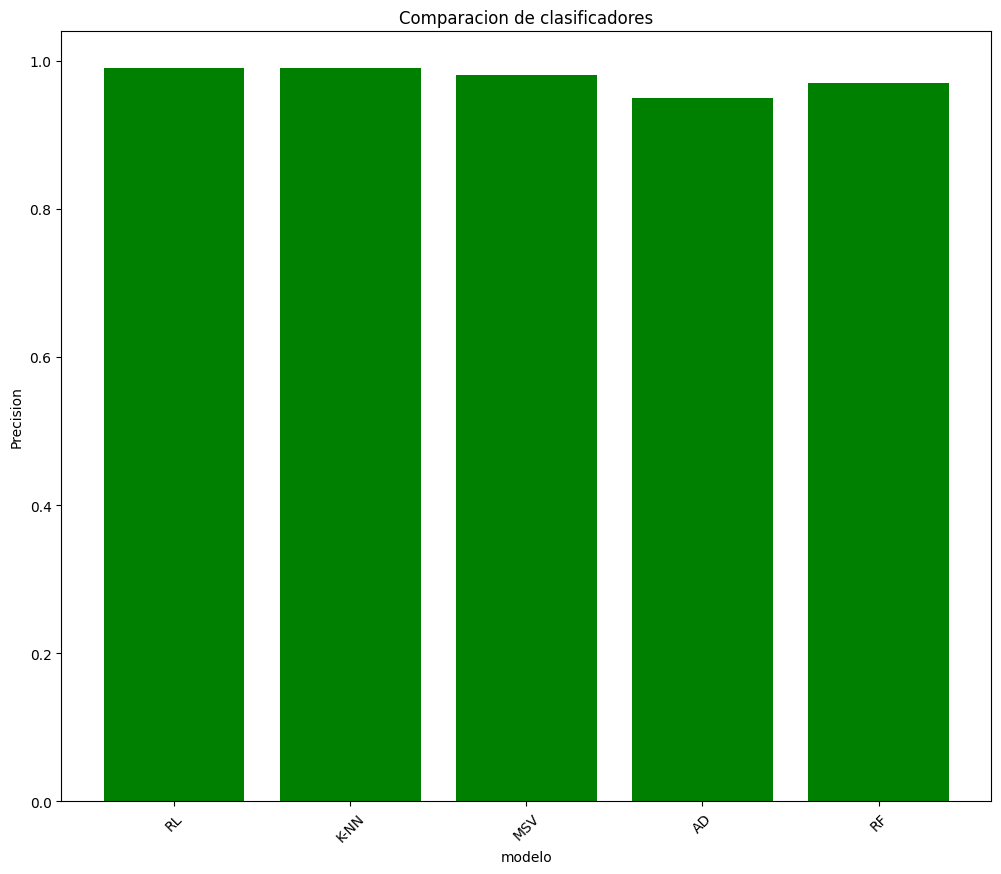


El mejor clasificador es: RL con una precisión de 0.990000


In [140]:
import matplotlib.pyplot as plt

#extraer precisiones
precisiones = {}
for nombre, resultados in clasificadores.resultados.items():
    precisiones[nombre] = resultados['accuracy']

#Imprimir precisiones
print("\n Comparacion de precision ")
for nombre, precision in precisiones.items():
    print(f"{nombre}: {precision:.6f}")

#Graficar resultados
plt.figure(figsize=(12, 10))
plt.bar(precisiones.keys(), precisiones.values(), color='green')
plt.title("Comparacion de clasificadores")
plt.ylabel("Precision")
plt.xlabel("modelo")
plt.xticks(rotation=45)
plt.show()

#Identificar el mejor clasificador
mejor_modelo = max(precisiones, key=precisiones.get)
print(
    f"\nEl mejor clasificador es: {mejor_modelo} "
    f"con una precisión de {precisiones[mejor_modelo]:.6f}"
)